In [132]:
import numpy as np
inp = str(input("Input tex file to read: "))
with open(inp, 'r') as file:
    rfile = file.read().split(',')
print(rfile)

KeyboardInterrupt: Interrupted by user

Code to read in the input file. splits data by comma into an array. Used matmulttest.txt file for following answers and calculations.

In [133]:
mat1 = np.empty([4,4])
mat2 = np.empty([4,4])


Creates two empty arrays to be filled with the input data

In [134]:
matnum = 1
row=0
col=0
for x in rfile:
    if matnum==1:
        if ';' in x:
            numsplit = x.split(';')
            mat1[row][col] = int(numsplit[0])
            row=0
            col=0
            mat2[row][col] = int(numsplit[1])
            col=col+1
            matnum = 2
        else:
            num = int(x)
            mat1[row][col] = num
            if col==3:
                col = 0
                row = row + 1
            else:
                col = col+1
    else:
        num = int(x)
        mat2[row][col] = num
        if col==3:
                col = 0
                row = row + 1
        else:
            col = col+1

print(mat1)
print(mat2)
            
            
        

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


Uses a for loop to loop through the rfile array. From then on it switches which matrix it inputs values in based on the matnum variable being 1 or 2. I then check if a ; is in the program. This is for the dividing cell, in which I place the value to the left of the ; in the last cell of mat1 and the value to the righ of the ; as the first cell in mat2. the rest is just looping and filling in the matrix.

In [135]:
def algorithm1(A, B, C, p, q, r):
    for i in range(p):
        for j in range(r):
            sum = 0
            for k in range(q):
                sum = sum + A[i][k]*B[k][j]
            C[i][j]=sum
    return C
result1 = np.zeros((4,4))
algorithm1(mat1, mat2, result1, 4, 4, 4)
print(result1)

[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]


Algorithm one has inputs: A is p x q, B is q x r, and C is p x r matrix, as well as p,q, and r being the dimesions of said matrices. the output is as expected, a 4x4 matrix, or whatever a pxr matrix would be, with the values being the values of the two matrices multiplied by each other.


In [136]:
def algorithm2(A, B, C, p, q, r, T=5):
    for I in range(0,p,T):
        for J in range(0,r,T):
            for K in range(0,q,T):
                for i in range(I, min(I+T, p)):
                    for j in range(J, min(J+T, r)):
                        sum = 0
                        for k in range(K, min(K+T, q)):
                            sum = sum + A[i][k]*B[k][j]
                        C[i][j] = C[i][j] + sum
result2 = np.zeros([4,4])
algorithm2(mat1, mat2, result2, 4, 4, 4)
print(result2)


[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]


Algorithm 2 has inputs: A is p x q, B is q x r, and C is p x r matrix, as well as p, q, r as the dimensions, and a T=5 variable, being the step each of the 3 outer for loops will take in covering its range. The T also plays a factor for determining the minimum value for the inner 3 loops. The output, C, is expected to be a 4x4 or a pxr matrix with each value the corresponding value of A * B.


In [137]:
import math
def algorithm3(A, B, C, p, q, r):
    if (max(p,q,r) < 4):
        C = algorithm1(A, B, C, p, q, r) 
        return C
    else:
        if max(p,q,r) == p:
            if(p%2==0):
                A1, A2=np.vsplit(A,2)
                p = int(p/2)
                C1=np.zeros((p,r))
                C2=np.zeros((p,r))
                C1=algorithm3(A1, B, C1, p, q, r)
                C2=algorithm3(A2, B, C2, p, q, r)
                C=np.concatenate((C1,C2))
                return C
            else:
                p = int(math.floor(p/2))
                A1 = A[0:p,:]
                A2 = A[p:,:]
                C1=np.zeros((p,r))
                C2=np.zeros((p+1,r))
                C1=algorithm3(A1, B, C1, p, q, r)
                C2=algorithm3(A2, B, C2, p+1, q, r)
                C=np.concatenate((C1,C2))
                return C
            
        elif max(p,q,r) == r:
            if(r%2==0):
                B1, B2 = np.hsplit(B,2)
                r = int(r/2)
                C3=np.zeros((p,r))
                C4=np.zeros((p,r))
                C3=algorithm3(A, B1, C3, p, q, r)
                C4=algorithm3(A, B2, C4, p, q, r)
                C=np.vstack([np.hstack([C3,C4])])
                return C
            else:
                r = int(math.floor(r/2))
                mat1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 6, 8, 9]])
                B1 = B[:, :r]
                B2 = B[:, r:]
                C3=np.zeros((p,r))
                C4=np.zeros((p,r+1))
                C3=algorithm3(A, B1, C3, p, q, r)
                C4=algorithm3(A, B2, C4, p, q, r+1)
                C=np.vstack([np.hstack([C3,C4])])
                return C
        else:
            if (q%2==0):
                A1,A2 = np.hsplit(A,2)
                B1,B2 = np.vsplit(B,2)
                q = int(q/2)
                C5=np.zeros((p,r))
                C6=np.zeros((p,r))
                C5 = algorithm3(A1, B1, C5, p, q, r)
                C6 = algorithm3(A2, B2, C6, p, q, r)
                C=C5+C6
                return C
            else:
                q = int(math.floor(q/2))
                A1 = A[:,:q]
                A2 = A[:,q:]
                B1 = B[:q,:r]
                B2 = B[q:,:r]
                C5=np.zeros((p,r))
                C6=np.zeros((p,r))
                C5 = algorithm3(A1, B1, C5, p, q, r)
                C6 = algorithm3(A2, B2, C6, p, q+1, r)
                C=C5+C6
                return C
            
result3 = np.zeros([4,4])
result3 = algorithm3(mat1, mat2, result3, 4, 4, 4)
print(result3)

[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]


Algorithm 3 inputs are: input: A is p x q, B is q x r, and C is p x r matrix, as well as p, q, r as the dimensions. With the aid of stack exchange and stack overflow, as well as the numpy library, I found the function hsplit and vsplit to help split up matrices. this alogrithm is also recursive, splitting matrices until each dimension(p,q, and r) is less than 4 or whatever constant. When all dimensions are less than 4, it calls algorithm 1 to do the rest of the simple multiplication. this is probably becauyse algorithm 1 is faster at these lower input values. Output is once again exepcted, C, to be a 4x4 or pxr matrix that results from multiplying A and B

In [163]:
import math
def algorithm4(A, B, C):
    rows = A.shape[0]
    n= math.log(rows,2)
    if n==0:
        C=[[A[0][0] * B[0][0]]]
        return C
    else:
        exp = int(math.pow(2,n-1))
        Aleft,Aright = np.hsplit(A,2)
        A1,A2 = np.vsplit(Aleft,2)
        A3,A4 = np.vsplit(Aright,2)
        Bleft,Bright = np.hsplit(B,2)
        B1,B2 = np.vsplit(Bleft,2)
        B3,B4 = np.vsplit(Bright,2)
        
        C1 = np.zeros((exp,exp))
        C2 = np.zeros((exp,exp))
        C3 = np.zeros((exp,exp))
        C4 = np.zeros((exp,exp))
        C1A = algorithm4(A1, B1, C1)
        C1B = algorithm4(A3, B2, C1) 
        C2A = algorithm4(A2, B1, C2)
        C2B = algorithm4(A4, B2, C2) 
        C3A = algorithm4(A1, B3, C3)
        C3B = algorithm4(A3, B4, C3) 
        C4A = algorithm4(A2, B3, C4)
        C4B = algorithm4(A4, B4, C4) 
        
        C1 = np.add(C1A,C1B)
        C2 = np.add(C2A,C2B)
        C3 = np.add(C3A,C3B)
        C4 = np.add(C4A,C4B)
        Ctemp = np.concatenate((C1,C2))
        Ctemp2 = np.concatenate((C3,C4))
        C = np.vstack([np.hstack([Ctemp,Ctemp2])])
        return C
result4 = np.zeros([4,4])
result4 = algorithm4(mat1, mat2, result4)
print(result4)

[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]


Algorithm 4 inputs are: A is 2n x 2n , B is 2n x 2n , and C is 2n x 2n matrix. I used the function hsplit and vsplit to help partition the matrices into equal size blocks. this algorithm is also recursive, partitioning matrices until the n(in 2^n x 2^n) 0. When it becomes 0, it means that it is a single cell for A and B, which can just be multipled and recursively goes back to the original call. Output is once again exepcted, C, to be a 4x4 or pxr matrix that results from multiplying A and B

In [164]:
def algorithm5(A, B, C):
    rows = A.shape[0]
    n= math.log(rows,2)
    if n < 3:
        p = A.shape[0]
        q = A.shape[1]
        r = B.shape[0]
        algorithm1(A, B, C, p, q, r)
        return C
    else:
        exp = int(math.pow(2,n-1))
        Aleft,Aright = np.hsplit(A,2)
        A1,A2 = np.vsplit(Aleft,2)
        A3,A4 = np.vsplit(Aright,2)
        Bleft,Bright = np.hsplit(B,2)
        B1,B2 = np.vsplit(Bleft,2)
        B3,B4 = np.vsplit(Bright,2)

        M1 = np.zeros((exp,exp))
        M2 = np.zeros((exp,exp))
        M3 = np.zeros((exp,exp))
        M4 = np.zeros((exp,exp))
        M5 = np.zeros((exp,exp))
        M6 = np.zeros((exp,exp))
        M7 = np.zeros((exp,exp))

        M1 = algorithm5(A1+A4,B1+B4,M1)
        M2 = algorithm5(A2+A4,B1,M2)
        M3 = algorithm5(A1,B3-B4,M3)
        M4 = algorithm5(A4,B2-B1,M4)
        M5 = algorithm5(A1+A3,B4,M5)
        M6 = algorithm5(A2-A1,B1+B3,M6)
        M7 = algorithm5(A3-A4,B2+B4,M7)

        C1 = np.add(np.subtract(np.add(M1,M4),M5),M7)
        C2 = np.add(M2,M4)
        C3 = np.add(M3,M5)
        C4 = np.add(np.add(np.subtract(M1,M2),M3),M6)

        Ctemp = np.concatenate((C1,C2))
        Ctemp2 = np.concatenate((C3,C4))
        C = np.vstack([np.hstack([Ctemp,Ctemp2])])
        return C
result5 = np.zeros([4,4])
result5 = algorithm5(mat1, mat2, result5)
print(result5)

[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]


Algorithm 5 inputs are: A is 2n x 2n , B is 2n x 2n , and C is 2n x 2n matrix. I used the function hsplit and vsplit to help partition the matrices into equal size blocks. this algorithm is also recursive, partitioning matrices until the n(in 2^n x 2^n) < 3. When it becomes < 3, it algorithm 1 to finish the rest of the multiplication and recursively go back. Output is once again exepcted, C, to be a 4x4 or pxr matrix that results from multiplying A and B. The difference between Algorithm 4 and 5 is the method of multiplication of the spliced matrices. The different way of multiplying them (one using M variables and one not) coudl mean one is more optimal than another with a certain set of variables, but a different set could change the optimization.

In [159]:
result1 = np.zeros((4,4))
algorithm1(mat1, mat2, result1, 4, 4, 4)
result2 = np.zeros([4,4])
algorithm2(mat1, mat2, result2, 4, 4, 4)
result3 = np.zeros([4,4])
result3 = algorithm3(mat1, mat2, result3, 4, 4, 4)
result4 = np.zeros([4,4])
result4 = algorithm4(mat1, mat2, result4)
result5 = np.zeros([4,4])
result5 = algorithm5(mat1, mat2, result5)
result = f'Algorithm-1: \n{np.array2string(result1)}; \nAlgorithm-2: \n{np.array2string(result2)}; \nAlgorithm-3: \n{np.array2string(result3)}; \nAlgorithm-4: \n{np.array2string(result4)}; \nAlgorithm-5: \n{np.array2string(result5)}'
print(result)

Algorithm-1: 
[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]; 
Algorithm-2: 
[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]; 
Algorithm-3: 
[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]; 
Algorithm-4: 
[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]; 
Algorithm-5: 
[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]


This block is just organzing and formatting the answers of the to fit the specifications

In [160]:
matpairs = []
for i in range(10,301,10):
    pair1 = np.random.rand(i,i)
    pair2 = np.random.rand(i,i)
    pair = [pair1,pair2]
    matpairs.append(pair)
    

Declared an array for matrix pairs outside of the for loop for values to be appended to.
The for loop loops through values 10(inclusive) to 301(exclusive) by steps of 10(10,20,30,etc.). Each iteration, I make two square matrices with the same dimensions, using the numpy function, random.rand. This makes a matrix of ixi, with each cell in the matrix being a value between 0 and 1. These are then appended as a pair into the matpairs array.

In [161]:
import math
import time
import pandas as pd
col1 = []
alg1avg = []
alg2avg = []
alg3avg = []
T1col = []
T2col = []
T3col = []
for i in matpairs:
    row = i[0].shape[0]
    T1 = math.ceil(15*math.pow(row,3)+9*math.pow(row,2)+2*row+1)
    T1col.append(T1)
    T2 = math.ceil(15/2*math.pow(row,6) + 8*math.pow(row,5)+15/2*math.pow(row,4) + 8*math.pow(row,3) + 2*row*row + 2*row + 1)
    T2col.append(T2)
    T3 = math.ceil(math.pow(row, math.log(6,2)))
    T3col.append(T3)
    col1.append(row)
    emp = np.zeros((row,row))
    t1a1 = time.time_ns()
    algorithm1(i[0],i[1],emp,row,row,row)
    t2a1=time.time_ns()
    a1difference = int((t2a1-t1a1)/10)
    alg1avg.append(a1difference)
        
    emp = np.zeros((row,row))
    t1a2 = time.time_ns()
    algorithm2(i[0],i[1],emp,row,row,row)
    t2a2=time.time_ns()
    a2difference = int((t2a2-t1a2)/10)
    alg2avg.append(a2difference)
        
    emp = np.zeros((row,row))
    t1a3 = time.time_ns()
    algorithm3(i[0],i[1],emp,row,row,row)
    t2a3=time.time_ns()
    a3difference = int((t2a3-t1a3)/10)
    alg3avg.append(a3difference)
data = {'Input Size' : col1, 'alg1' : alg1avg, 'alg2' : alg2avg, 'alg3' : alg3avg, 'T1(n)':T1col,'T2(n)':T2col,'T3(n)':T3col}
df = pd.DataFrame(data)
print(df)

    Input Size       alg1       alg2        alg3      T1(n)             T2(n)  \
0           10      47700      73700      159100      15921           8383221   
1           20     382300     518100      844100     123641         506864841   
2           30     732500     949700     2840300     413161        5668192861   
3           40    1512300    1738900     2815600     974481       31558915281   
4           50    2613800    3186300     6077400    1897601      119735380101   
5           60    4379600    5573000    17234800    3272521      356239735321   
6           70    6709800    9079000    24258200    5189241      895995928941   
7           80   10749000   14012300    22336800    7737761     1992605708961   
8           90   14745200   19805200    33889900   11008081     4033544623381   
9          100   25422000   29014100    50512300   15090201     7580758020201   
10         110   26701000   35831400    84274000   20074121    13416657047421   
11         120   37570700   

Started by making an array for each column to be. I then started a for loop, that will loop through each pair in matpairs. Each iteration i would start off using the shape function to find the matrix dimenions(since they are all square matrices row/column doesn't matter). After I found the dimension I calculated the theoretical time complexity using the formulas dervied and explained in the word document. Then, for each algorithm, I created an empty array to hold the final value, clocked in using time(), ran the algorithm, clocked out ising time(), and found the difference in time.I then added thes differences to their respective columns. After the loop, I order the data in a dictionary of key:value pairs, and created the data frame using pandas. I put these in nanoseconds and /10 to make the data a little closer to the T(n) values.

<Axes: xlabel='Input Size', ylabel='Algorithm 3 runtime'>

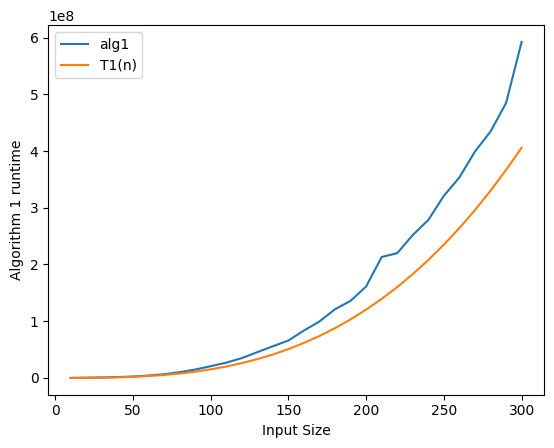

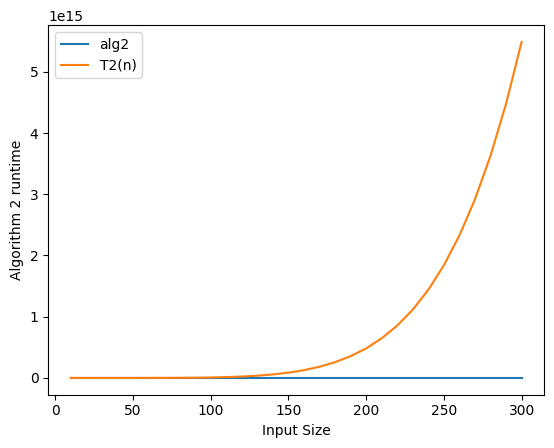

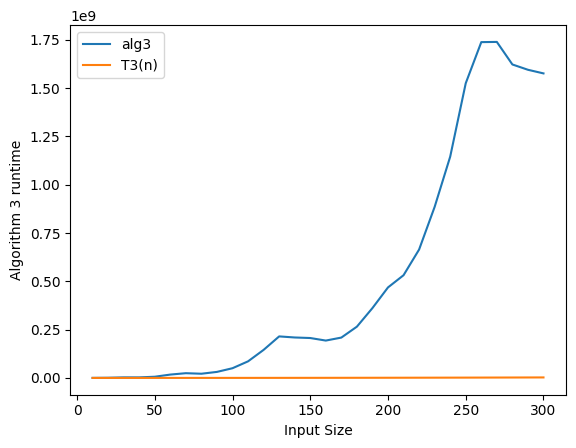

In [143]:
ax = df.plot.line(x='Input Size', y='alg1', xlabel='Input Size', ylabel='Algorithm 1 runtime')
df.plot.line(x = 'Input Size', y = 'T1(n)', ax=ax)
ax2 = df.plot.line(x='Input Size', y='alg2', xlabel='Input Size', ylabel='Algorithm 2 runtime')
df.plot.line(x = 'Input Size', y = 'T2(n)', ax=ax2)
ax3 = df.plot.line(x='Input Size', y='alg3', xlabel='Input Size', ylabel='Algorithm 3 runtime')
df.plot.line(x='Input Size', y='T3(n)', ax = ax3)

With the aid of stack exchange I was able to find a method to create two data lines on the same graph using the ax parameter. Then through plot.line() I created 3 graphs: A input size vs algorithm 1 runtimes, an input size vs algorithm 2 runtimes, and an input size vs algorithm 3 runtimes.

In [144]:
matpairs2 = []
for i in range(10):
    pair1 = np.random.rand(int(math.pow(2,i)),int(math.pow(2,i)))
    pair2 = np.random.rand(int(math.pow(2,i)),int(math.pow(2,i)))
    pair = [pair1,pair2]
    matpairs2.append(pair)


Declared an array for matrix pairs outside of the for loop for values to be appended to.
The for loop loops through values 0(inclusive) to 10(exclusive). Each iteration, I make two square matrices with the same dimensions, using the numpy function, random.rand. With these dimensions, they will always be 2^loop variable to insure the dimensions be 2^n so algorithms 4 and 5 can be utilized. This makes a matrix of 2^ix2^i, with each cell in the matrix being a value between 0 and 1. These are then appended as a pair into the matpairs array.

In [166]:
import math
import time
import pandas as pd
col1 = []
alg1avg2 = []
alg3avg2 = []
alg4avg = []
alg5avg = []
T1col2 = []
T3col2 = []
T4col = []
T5col = []
for i in matpairs2:
    row = i[0].shape[0]
    T1 = math.ceil(15*math.pow(row,3)+9*math.pow(row,2)+2*row+1)
    T1col2.append(T1)
    T3 = math.ceil(math.pow(row, math.log(6,2)))
    T3col2.append(T3)
    T4 = math.ceil(math.pow(row,3))
    T4col.append(T4)
    T5 = math.ceil(math.pow(row,math.log(7,2)))
    T5col.append(T5)
    col1.append(row)
    
    emp = np.zeros((row,row))
    t1a1 = time.time_ns()
    algorithm1(i[0],i[1],emp,row,row,row)
    t2a1=time.time_ns()
    a1difference2 = int((t2a1-t1a1)/10)
    alg1avg2.append(a1difference2)
    
    emp = np.zeros((row,row))
    t1a3 = time.time_ns()
    emp = algorithm3(i[0],i[1],emp,row,row,row)
    t2a3=time.time_ns()
    a3difference2 = int((t2a3-t1a3)/10)
    alg3avg2.append(a3difference2)
        
    emp = np.zeros((row,row))
    t1a4 = time.time_ns()
    emp = algorithm4(i[0],i[1],emp)
    t2a4=time.time_ns()
    a4difference = int((t2a4-t1a4)/10)
    alg4avg.append(a4difference)

    emp = np.zeros((row,row))
    t1a5 = time.time_ns()
    emp = algorithm5(i[0],i[1],emp)
    t2a5=time.time_ns()
    a5difference = int((t2a5-t1a5)/10)
    alg5avg.append(a5difference)
data = {'Input Size' : col1, 'alg1' : alg1avg2, 'alg3' : alg3avg2, 'alg4' : alg4avg, 'alg5':alg5avg,'T1(n)':T1col2,'T3(n)':T3col2,'T4(n)':T4col,'T5(n)':T5col}
df2 = pd.DataFrame(data)
print(df2)

   Input Size        alg1         alg3         alg4        alg5       T1(n)  \
0           1        1700         1500          800         400          27   
1           2         800          700        21600        2500         161   
2           4        9400        77700       130200        7300        1113   
3           8       50000       221100       515200       33200        8273   
4          16      213000       768500      2030000      115500       63777   
5          32      721400      3643300     13954600      726100      500801   
6          64     5268000     28797300    107815700     5345400     3969153   
7         128    42955700    270187100    857562500    36693800    31604993   
8         256   332631800   1762612200   6950847700   257816100   252248577   
9         512  2775958700  14214668600  55218008900  1825532400  2015626241   

      T3(n)      T4(n)     T5(n)  
0         1          1         1  
1         6          8         7  
2        36         64   

Started by making an array for each column to be. I then started a for loop, that will loop through each pair in matpairs. Each iteration i would start off using the shape function to find the matrix dimenions(since they are all square matrices row/column doesn't matter). After I found the dimension I calculated the theoretical time complexity using the formulas dervied and explained in the word document. Then, for each algorithm, I created an empty array to hold the final value, clocked in using time(), ran the algorithm, clocked out ising time(), and found the difference in time.I then added thes differences to their respective columns. After the loop, I ordered the data in a dictionary of key:value pairs, and created the data frame using pandas. I put these in nanoseconds and /10 to make the data a little closer to the T(n) values.

<Axes: xlabel='Input Size', ylabel='Algorithm 5 runtime'>

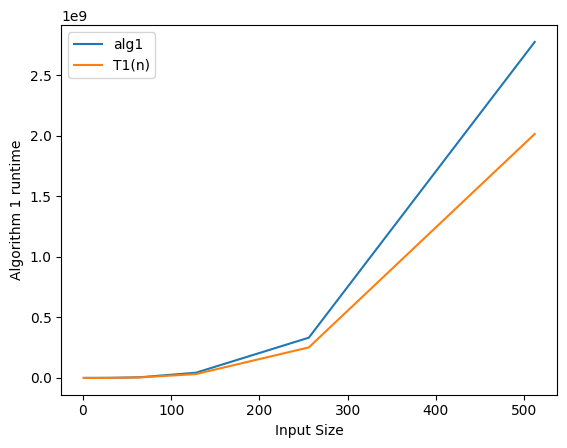

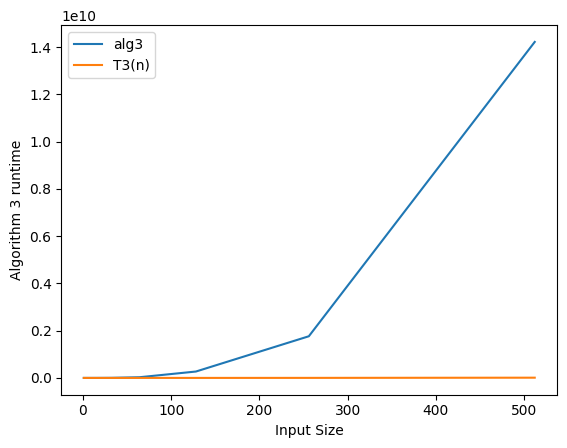

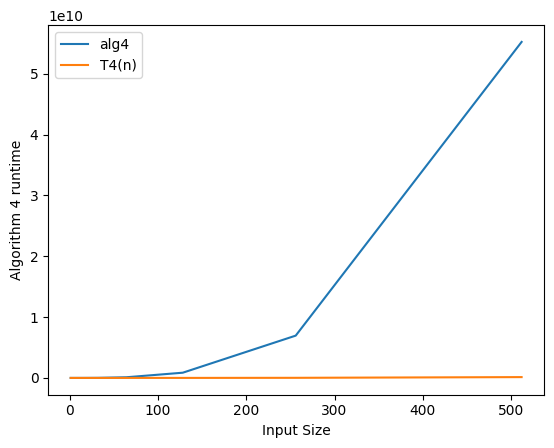

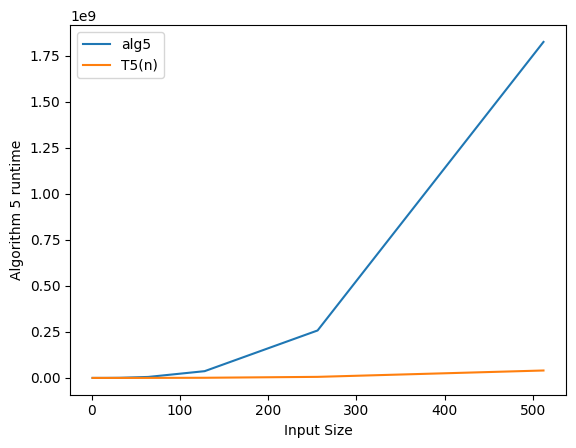

In [167]:
ax = df2.plot.line(x='Input Size', y='alg1', xlabel='Input Size', ylabel='Algorithm 1 runtime')
df2.plot.line(x = 'Input Size', y = 'T1(n)', ax=ax)
ax2 = df2.plot.line(x='Input Size', y='alg3', xlabel='Input Size', ylabel='Algorithm 3 runtime')
df2.plot.line(x = 'Input Size', y = 'T3(n)', ax=ax2)
ax3 = df2.plot.line(x='Input Size', y='alg4', xlabel='Input Size', ylabel='Algorithm 4 runtime')
df2.plot.line(x='Input Size', y='T4(n)', ax = ax3)
ax4 = df2.plot.line(x='Input Size', y='alg5', xlabel='Input Size', ylabel='Algorithm 5 runtime')
df2.plot.line(x = 'Input Size', y = 'T5(n)', ax=ax4)

With the aid of stack exchange I was able to find a method to create two data lines on the same graph using the ax parameter. Then through plot.line() I created 4 graphs: An input size vs algorithm 1 runtimes, an input size vs algorithm 3 runtimes, an input size vs algorithm 4 runtimes, and an input size vs algorithm 5 runtimes.

In [150]:
import random
matchainlist = []
Plist = []
for x in range(2,21):
    matchain = []
    P = []
    for y in range(11):
        i = random.randint(10,x*10)
        P.append([y,i])
        if y > 0:       
            matchain.append(np.random.rand(P[y-1][1], P[y][1]))
    matchainlist.append(matchain)
    Plist.append(P)

Starts by declaring a matric chain list array. I then go into a for loop ranging from 2-21(creates 19 chains). Each loop will declare a chain array and a P array for dimension indexes. A inner for loop is then started which sets a new variable i to be some interger between 10 and x * 10(finds a single dimension. A pair of (index, dimension) is appended to P. Furthermore, if y >0(its second iteration) it will take the previous iterations dimension and the current iteration dimension, and creates a matrix using np.random.rand with the matrix being prev x current dimensions. Outside of the inner for loop, I then append matrix chain into the matrix chain list. A Plist array was added for ease when finding the run time of the optimized chain multiplication, as it helps a great deal with the Matrix Chain Order function.

In [151]:
chainnum = []
upperbound = []
seqmult = []
for i in range(2,20):
    chainnum.append(i)
    upperbound.append(i*10)
    A = matchainlist[i-2][0]
    t1a1 = time.time_ns()
    for j in range(1,10):
        B = matchainlist[i-2][j]
        p = A.shape[0]
        q = A.shape[1]
        r = B.shape[1]
        C = np.zeros((p,r))
        algorithm1(A, B, C, p, q, r)
        A = C
    t2a1 = time.time_ns()
    tdif = t2a1-t1a1
    seqmult.append(tdif)
        
        

Here I found the runtime for a sequential multiplication, going from the first matrix * the second one, and on. I also made arrays for the chain # and upper bound for the dataframe later on. Evey time from each matrix chain was appended to the seqmult array for the dataframe. 

In [152]:
def Matrix_Chain_Order(p,n):
    m = np.zeros((n,n))
    s = np.zeros((n,n))
    for i in range(n):
        m[i,i] = 0
    for l in range(1,n-1):
        for i in range(1,n-l):
            j=i+l
            m[i][j] = float('inf')
            for k in range(i,j):
                q = m[i][k] + m[k+1][j] + p[i-1][1]*p[k][1]*p[j][1]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k
    return m,s





This is the implementation for the Matrix chain order algorithm given in the notes. I adjusted the values so the pseudocode would fit the array indices (i.e. switching some starting for loops down to 1, etc.). Inputs: an array of dimensions, p, and the length of said array, n. Output: two 'matrices', with the second, s, being used for the later on optimized algorithm.

In [153]:
def PRINTOPTIMALPARENS(s, i, j):
    if (i == j):
        return (f"A{i}")
    else:
        return '(' + PRINTOPTIMALPARENS(s, i, int(s[i][j])) + PRINTOPTIMALPARENS(s, int(s[i][j]) + 1, j) + ')'


this algorithm is from the textbook with a slight twist. My first thought for optimizing the multiplication was to take this as a string and iterate throughout it until I had two arrays next to each other with no parenthesis. I found it to be more difficult a task, but left this algorithm to return a string which gets called to be printed later on. Inputs were an s matrix(the one from matrix chain order), as well as bounds of how many dimensions you want to optimize(I only used i = 0 and j as the length, because that fully optimizes the whole matrix chain) 

In [154]:
def MatChainMult(A, s, i, j):
    if (i == j):
        return A[i]
    else:
        A1 = MatChainMult(A, s, i, int(s[i][j]))
        A2 = MatChainMult(A, s, int(s[i][j]) + 1, j)
        C1 = np.zeros((A1.shape[0], A2.shape[1]))
        algorithm1(A1, A2, C1, A1.shape[0], A1.shape[1], A2.shape[1])
        return C1

this was my second, and much simpler way, of optimizing the chain multiplication. It is basically a print parenthesis algorithm but returns the index or the C, matrix, from algorithm 1 and recursively works its way back, making it the most optimal multiplication path. Inputs: a matrix chain, A, as well as the same 3 parameters from PRINTOPTIMALPARENS. The Result output is the fully multiplied matrix. 

In [155]:
optimalarray = []
for x in range(2,21):
    mm,ss = Matrix_Chain_Order(Plist[x-2],len(Plist[x-2]))
    OPTIMALPAREN = PRINTOPTIMALPARENS(ss,0,len(matchain)-1)
    print(OPTIMALPAREN)
    optimalt = time.time_ns()
    Mat = MatChainMult(matchain, ss, 0, len(matchain)-1)
    optimalt2 = time.time_ns()
    optimaldiff = optimalt2 - optimalt
    optimalarray.append(optimaldiff)
data = {'Chain ID' : chainnum, 'Upper Bound': upperbound, 'Sequential Multiplication' : tdif, 'Optimal Multiplication' : optimaldiff}
df3 = pd.DataFrame(data)
print(df3)

(A0((A1(A2(A3(A4(A5(A6A7))))))(A8A9)))
(A0((A1A2)((((((A3A4)A5)A6)A7)A8)A9)))
(A0(A1(A2(A3(A4(A5(A6(A7(A8A9)))))))))
(A0((A1((A2A3)(((A4A5)(A6A7))A8)))A9))
(A0(A1((A2(A3(A4(A5(A6A7)))))(A8A9))))
(A0((A1A2)((((((A3A4)A5)A6)A7)A8)A9)))
(A0((A1(A2(A3(A4(A5A6)))))((A7A8)A9)))
(A0(A1(((((A2A3)A4)(A5A6))(A7A8))A9)))
(A0((A1(A2(A3(A4(A5(A6A7))))))(A8A9)))
(A0((A1A2)((((((A3A4)A5)A6)A7)A8)A9)))
(A0((((((((A1A2)A3)A4)A5)A6)A7)A8)A9))
(A0((A1A2)((((((A3A4)A5)A6)A7)A8)A9)))
(A0((A1((A2A3)(A4(A5(A6(A7A8))))))A9))
(A0((A1(A2(A3A4)))((((A5A6)A7)A8)A9)))
(A0((A1(A2(A3A4)))((((A5A6)A7)A8)A9)))
(A0(A1(((((((A2A3)A4)A5)A6)A7)A8)A9)))
(A0(A1(A2(A3(A4(A5(A6(A7(A8A9)))))))))
(A0((A1(A2A3))(((((A4A5)A6)A7)A8)A9)))
(A0((((((((A1A2)A3)A4)A5)A6)A7)A8)A9))
    Chain ID  Upper Bound  Sequential Multiplication  Optimal Multiplication
0          2           20                 2243387000              1198546000
1          3           30                 2243387000              1198546000
2          4           40   

Like what I did for the sequential multiplication, I iterated through the array of matrix chains as a for loop. I then decided to also print out the optimal parenthesis for each iteration to show the difference, as well as observe how none were sequential. The Plist came in handy here, because if not for it, P by itself would be reset every iteration for the Matrix chain order algorithm. I then took the time before and after calling MatChainMult(), and appended that to an array of time differences. With all of the variables and lists I need, I created a dictionary with key value pairs and made it into a dataframe with pandas. 

<Axes: xlabel='Upper Bound', ylabel='Multiplication Runtime'>

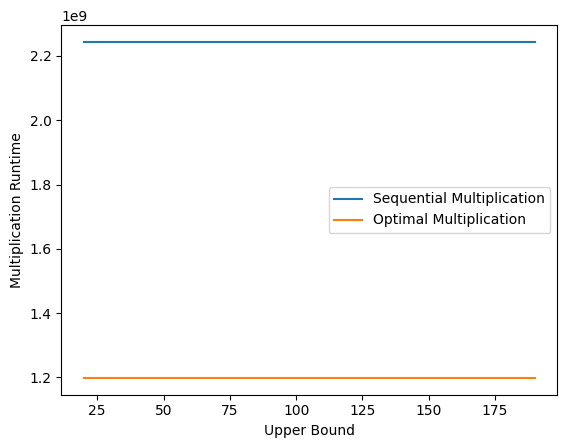

In [156]:
ax = df3.plot.line(x='Upper Bound', y='Sequential Multiplication', xlabel='Upper Bound', ylabel='Multiplication Runtime')
df3.plot.line(x = 'Upper Bound', y = 'Optimal Multiplication', ax=ax)

I then decided to plot the lines the same way I did for experiment 1 and 2, using pandas. 